<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M0.532 · Pattern Recognition</p>
<p style="margin: 0; text-align:right;">Computational Engineering and Mathematics Master</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Computers, Multimedia and Telecommunications Department</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

In this notebook we will see how to use a pre-trained Faster R-CNN model for inference and how to train it in our own dataset.

## Faster R-CNN inference

First, we will see how to use the Faster R-CNN model to detect objects in different images without doing any training, just using the pre-trained model on COCO dataset.

We mount our Google Drive on Google Colab to have access to some images that we will use for testing the object detection model.

In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We import some libraries that we will need. We will use the pretrained Faster R-CNN model with a ResNet-50 backbone and a Feature Pyramid Network (FPN) from the torchvision library, which includes several models for object detection in torchvision.models.detection. We specify that the model will be used for inference with the eval() method. We also define a dictionary with all the category names annotated in COCO dataset.

Then, we define a function get_prediction that use the model previously defined to make the predictions on a given image and returns the bounding boxes of the predicted objects and their categories.

We also define a function object_detection_api that will call the previous function to get the predictions over an image. This function extends the previous one with some visualization by showing the predicted bounding boxes and the categories on top of the image.

Both functions include a threshold which is used to filter those predictions with a low confidence score. Only those predictions with a confidence score higher than the threshold will be returned by the get_prediction function and showed by the object_detection_api function.

In [ ]:
import torchvision
from PIL import Image
import torch
from torchvision import transforms
import cv2
import matplotlib.pyplot as plt

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def get_prediction(img_path, threshold):

    img = Image.open(img_path)
    
    # Defing PyTorch Transform
    transform = transforms.Compose(
        [transforms.ToTensor()])
    # Apply the transform to the image
    img = transform(img) 
    # Pass the image to the model
    pred = model([img])
    # Get the Prediction Score
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    # Bounding boxes
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] 
    pred_score = list(pred[0]['scores'].detach().numpy())
    # Get list of index with score greater than threshold.
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] 
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class

def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
    # Get predictions
    boxes, pred_cls = get_prediction(img_path, threshold) 
    # Read image with cv2
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(boxes)):
        # Draw Rectangle with the coordinates
        cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) 
        # Write the prediction class
        cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) 
    plt.figure(figsize=(20,30)) # display the output image
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Next, we show some examples of the object_detection_api function for different images.

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


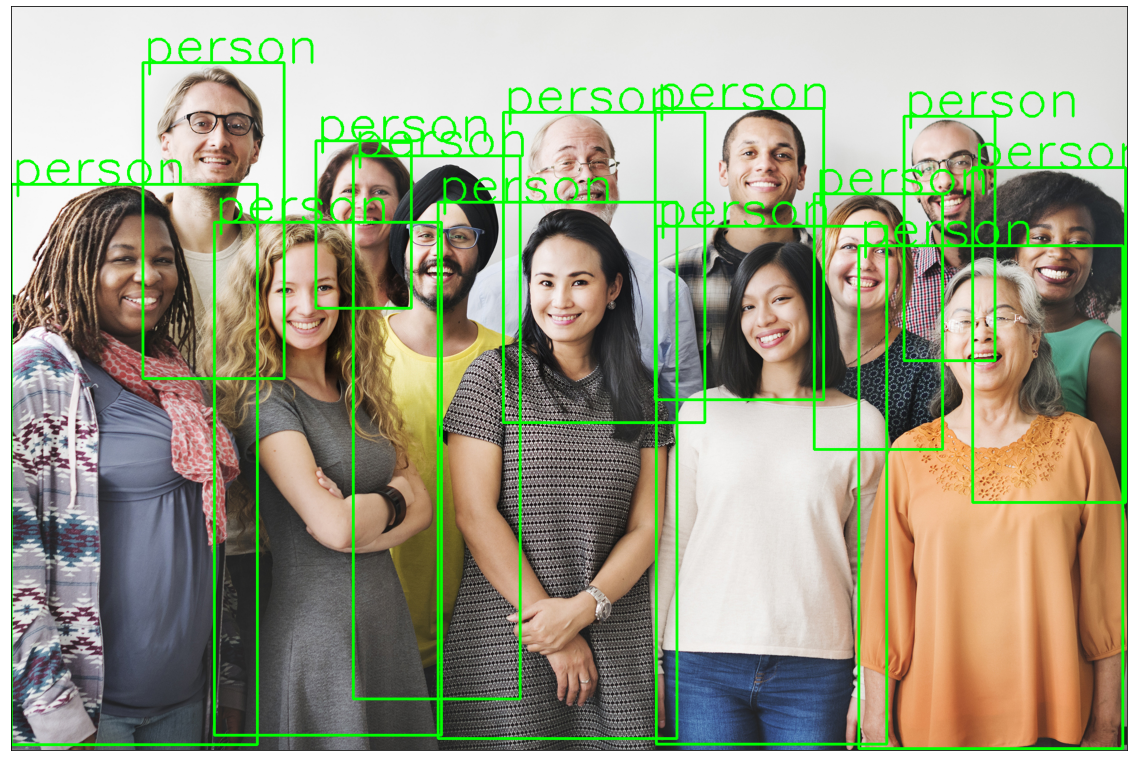

In [ ]:
object_detection_api('/content/drive/My Drive/Docència/Reconeixement de Patrons/Notebooks/Object Detection/Images/people.jpg', threshold=0.8)


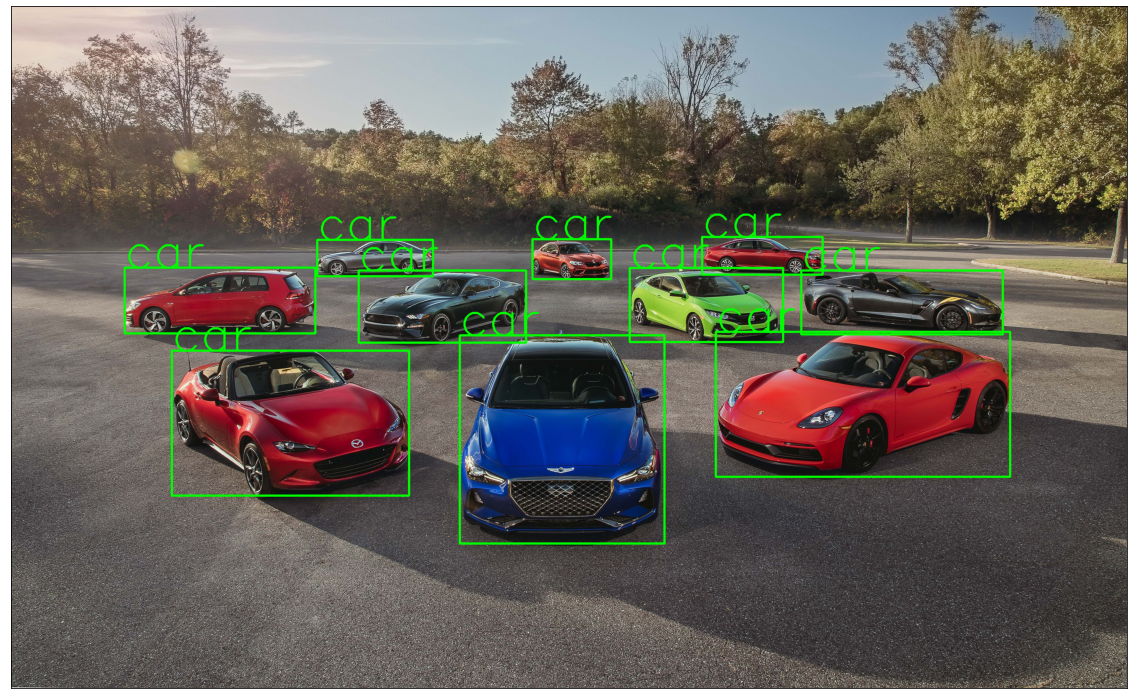

In [ ]:
object_detection_api('/content/drive/My Drive/Docència/Reconeixement de Patrons/Notebooks/Object Detection/Images/car.jpg', rect_th=6, text_th=5, text_size=5)

In [ ]:
object_detection_api('/content/drive/My Drive/Docència/Reconeixement de Patrons/Notebooks/Object Detection/Images/traffic.jpg', rect_th=2, text_th=1, text_size=1)

Output hidden; open in https://colab.research.google.com to view.

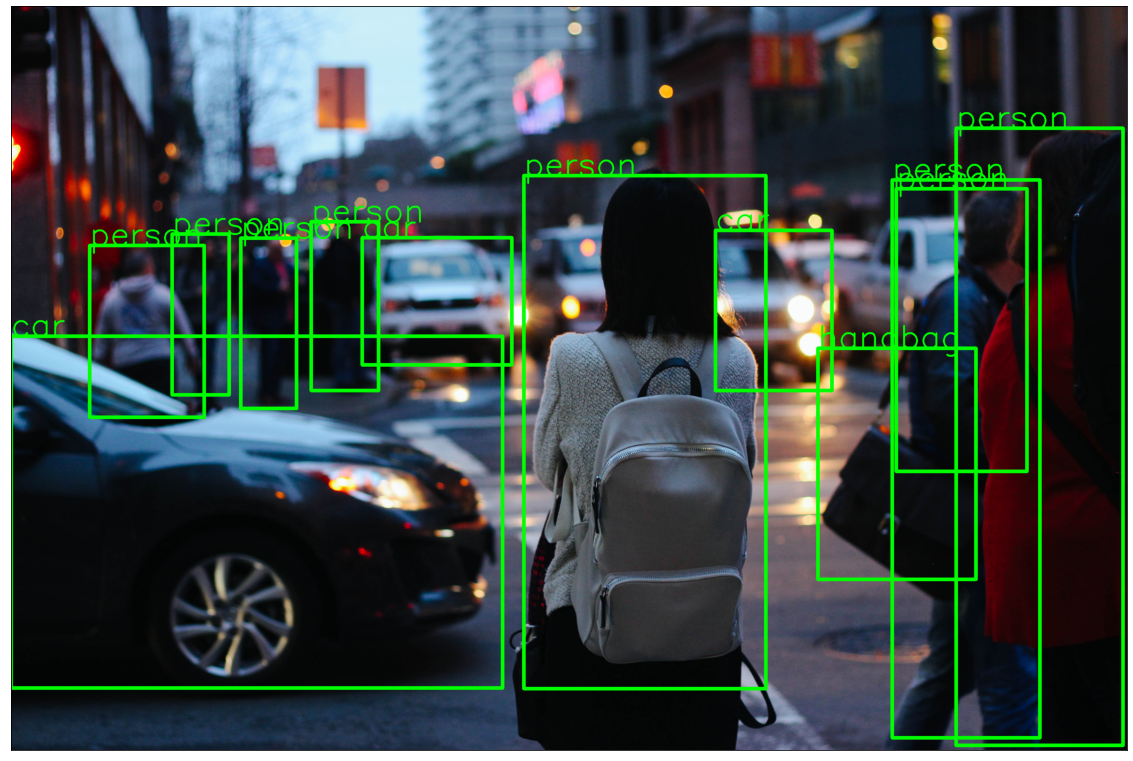

In [ ]:
object_detection_api('/content/drive/My Drive/Docència/Reconeixement de Patrons/Notebooks/Object Detection/Images/girl_cars.jpg', rect_th=15, text_th=7, text_size=5, threshold=0.8)  


## Faster R-CNN training

Now, we will see how to train the Faster R-CNN model for our own dataset, instead of just using the pretrained model as done before. This part of the notebook is based on [this code](https://www.kaggle.com/yerramvarun/fine-tuning-faster-rcnn-using-pytorch/notebook).




In references/detection/ from Torchvision repo, we have a number of helper functions to simplify training and evaluating detection models.

In [ ]:
# Download TorchVision repo to use some files from
# references/detection
!pip install albumentations==0.4.6
!pip install pycocotools --quiet
!git clone https://github.com/pytorch/vision.git
!git checkout v0.3.0

!cp vision/references/detection/utils.py ./
!cp vision/references/detection/transforms.py ./
!cp vision/references/detection/coco_eval.py ./
!cp vision/references/detection/engine.py ./
!cp vision/references/detection/coco_utils.py ./

     |████████████████████████████████| 117 kB 5.3 MB/s 
     |████████████████████████████████| 948 kB 10.6 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=9930368a7fa387552ba8d32ddb8f2b7ff1c4f518abc995c1152d28d7c07c0eda
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
Cloning into 'vision'...
remote: Enumerating objects: 61417, done.
remote: Counting objects: 100% (1189/1189), done.
remote: Compressing objects: 100% (476/476), done.
remote: Total 61417 (delta 1057), reused 778 (delta 709), pack-reused 6

We also import some basic Python and Machine Learning libraries.

In [ ]:
# Basic python and ML Libraries
import os
import random
import numpy as np
import pandas as pd
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# We will be reading images using OpenCV
import cv2

# xml library for parsing xml files
from xml.etree import ElementTree as et

# matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# torchvision libraries
import torch
import torchvision
from torchvision import transforms as torchtrans  
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# these are the helper libraries imported.
from engine import train_one_epoch, evaluate
import utils
import transforms as T

# for image augmentations
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

We mount our Google Drive on Google Colab in order to have access to the dataset that we will use for training our object detection model.

In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')

Mounted at /content/drive


We will use a dataset of fruits, which includes three different categories: apple, banana and orange. As done in a previous notebook with the Penn-Fudan Dataset, we need to implement our own dataset loader. Any dataset loader needs to have three different methods implemented. The $__init__$ method, which contains all the image filenames of the dataset (check self.imgs) and the different categories considered (check self.classes) besides other characteristics of the dataset, such as the image resolution. The $__getitem__$ method returns the element of the dataset corresponding to a given index. It returns the image resized and a variable named target, which is a dictionary including information about the bounding box, the category and the area (among others) for each object annotated in that given image. Finally, the $__len__$ method returns the number of images in the dataset.

In [ ]:
# defining the files directory and testing directory
files_dir = '/content/drive/My Drive/Docència/Reconeixement de Patrons/Notebooks/Object Detection/Images/FruitsDataset/train_zip/train'
test_dir = '/content/drive/My Drive/Docència/Reconeixement de Patrons/Notebooks/Object Detection/Images/FruitsDataset/test_zip/test'


class FruitImagesDataset(torch.utils.data.Dataset):

    def __init__(self, files_dir, width, height, transforms=None):
        self.transforms = transforms
        self.files_dir = files_dir
        self.height = height
        self.width = width
        
        # sorting the images for consistency
        # To get images, the extension of the filename is checked to be jpg
        self.imgs = [image for image in sorted(os.listdir(files_dir))
                        if image[-4:]=='.jpg']
        
        
        # classes: 0 index is reserved for background
        self.classes = [_, 'apple','banana','orange']

    def __getitem__(self, idx):

        img_name = self.imgs[idx]
        image_path = os.path.join(self.files_dir, img_name)

        # reading the images and converting them to correct size and color    
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        img_res = cv2.resize(img_rgb, (self.width, self.height), cv2.INTER_AREA)
        # diving by 255
        img_res /= 255.0
        
        # annotation file
        annot_filename = img_name[:-4] + '.xml'
        annot_file_path = os.path.join(self.files_dir, annot_filename)
        
        boxes = []
        labels = []
        tree = et.parse(annot_file_path)
        root = tree.getroot()
        
        # cv2 image gives size as height x width
        wt = img.shape[1]
        ht = img.shape[0]
        
        # box coordinates for xml files are extracted and corrected for image size given
        for member in root.findall('object'):
            labels.append(self.classes.index(member.find('name').text))
            
            # bounding box
            xmin = int(member.find('bndbox').find('xmin').text)
            xmax = int(member.find('bndbox').find('xmax').text)
            
            ymin = int(member.find('bndbox').find('ymin').text)
            ymax = int(member.find('bndbox').find('ymax').text)
            
            
            xmin_corr = (xmin/wt)*self.width
            xmax_corr = (xmax/wt)*self.width
            ymin_corr = (ymin/ht)*self.height
            ymax_corr = (ymax/ht)*self.height
            
            boxes.append([xmin_corr, ymin_corr, xmax_corr, ymax_corr])
        
        # convert boxes into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        
        # getting the areas of the boxes
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        # suppose all instances are not crowd
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)
        
        labels = torch.as_tensor(labels, dtype=torch.int64)


        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["area"] = area
        target["iscrowd"] = iscrowd
        # image_id
        image_id = torch.tensor([idx])
        target["image_id"] = image_id


        if self.transforms:
            
            sample = self.transforms(image = img_res,
                                     bboxes = target['boxes'],
                                     labels = labels)
            
            img_res = sample['image']
            target['boxes'] = torch.Tensor(sample['bboxes'])
            
            
            
        return img_res, target

    def __len__(self):
        return len(self.imgs)


# check dataset
dataset = FruitImagesDataset(files_dir, 224, 224)
print('length of dataset = ', len(dataset), '\n')

# getting the image and target for a test index.  Feel free to change the index.
img, target = dataset[78]
print(img.shape, '\n',target)

length of dataset =  240 

(224, 224, 3) 
 {'boxes': tensor([[ 22.4000,  36.4903, 163.1000,  68.6452],
        [ 24.8500,  39.3806, 163.4500,  94.2968],
        [ 28.0000,  52.3871, 166.9500, 127.8968],
        [ 71.0500,  59.6129, 193.9000, 157.5226]]), 'labels': tensor([2, 2, 2, 2]), 'area': tensor([ 4524.1865,  7611.3750, 10492.0693, 12028.2041]), 'iscrowd': tensor([0, 0, 0, 0]), 'image_id': tensor([78])}


We also define a function to visualize the bounding boxes in an image.

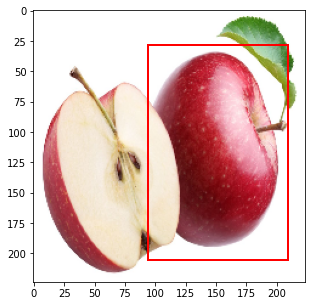

In [ ]:
# Function to visualize bounding boxes in the image

def plot_img_bbox(img, target):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img)
    for box in (target['boxes']):
        x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
        a.add_patch(rect)
    plt.show()
    
# plotting the image with bboxes. Feel free to change the index
img, target = dataset[25]
plot_img_bbox(img, target)

We define the object detection model. We will use the pre-trained Faster R-CNN model on COCO dataset but we will replace the box predictor header to a new one for the specific number of classes of our dataset.

In [ ]:
def get_object_detection_model(num_classes):

    # load a model pre-trained pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes) 

    return model

We also define the transformations that will be used for training and testing.

In [ ]:
# Send train=True fro training transforms and False for val/test transforms
def get_transform(train):
    
    if train:
        return A.Compose([
                            A.HorizontalFlip(0.5),
                     # ToTensorV2 converts image to pytorch tensor without div by 255
                            ToTensorV2(p=1.0) 
                        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
    else:
        return A.Compose([
                            ToTensorV2(p=1.0)
                        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

Once we already have the dataset and the model defined, we need to instantiate them. Let's start with the dataset by defining the 20% of the dataset as the test subset and defining the train and test dataloaders. Notice that shuffle is used in training but not in testing. The reason is that in training the order of the images will affect the updating of the parameters and we want to change this order from one epoch to the other. This way, the model does not see the images always in the same order.

In [ ]:
# use our dataset and defined transformations
dataset = FruitImagesDataset(files_dir, 480, 480, transforms= get_transform(train=True))
dataset_test = FruitImagesDataset(files_dir, 480, 480, transforms= get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()

# train test split
test_split = 0.2
tsize = int(len(dataset)*test_split)
dataset = torch.utils.data.Subset(dataset, indices[:-tsize])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-tsize:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=10, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=10, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

Then, we instantiate the model and the parameters for training. Whereas in the previous notebook, we decided to freeze all the parameters from the pretrained model and only updating the weights of the new fully connected layer, here we will allow updating the weights of all the layers of the model.

In [ ]:
# to train on gpu if selected.
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


num_classes = 4

# get the model using our helper function
model = get_object_detection_model(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

We finally train our model for 10 epochs and we evaluate if after each epoch.

In [ ]:
# training for 10 epochs
num_epochs = 10

for epoch in range(num_epochs):
    # training for one epoch
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

Epoch: [0]  [ 0/20]  eta: 0:03:07  lr: 0.000268  loss: 1.5105 (1.5105)  loss_classifier: 1.2602 (1.2602)  loss_box_reg: 0.2377 (0.2377)  loss_objectness: 0.0076 (0.0076)  loss_rpn_box_reg: 0.0049 (0.0049)  time: 9.3871  data: 4.4108  max mem: 8204
Epoch: [0]  [10/20]  eta: 0:00:50  lr: 0.002897  loss: 0.9331 (0.9948)  loss_classifier: 0.5416 (0.6876)  loss_box_reg: 0.2718 (0.2969)  loss_objectness: 0.0034 (0.0044)  loss_rpn_box_reg: 0.0052 (0.0059)  time: 5.0800  data: 0.4459  max mem: 8470
Epoch: [0]  [19/20]  eta: 0:00:04  lr: 0.005000  loss: 0.6508 (0.7451)  loss_classifier: 0.3366 (0.4674)  loss_box_reg: 0.2377 (0.2657)  loss_objectness: 0.0055 (0.0058)  loss_rpn_box_reg: 0.0052 (0.0062)  time: 4.7000  data: 0.2644  max mem: 8470
Epoch: [0] Total time: 0:01:34 (4.7050 s / it)
creating index...
index created!
Test:  [0/5]  eta: 0:00:16  model_time: 2.3470 (2.3470)  evaluator_time: 0.0495 (0.0495)  time: 3.2357  data: 0.8120  max mem: 8470
Test:  [4/5]  eta: 0:00:02  model_time: 2.27

Let's see the predictions for a given image and see what happens when the non maximum suppression method is not used. First, let's define the non maximum suppression method, which consists on iteratively removing lower scoring boxes which have an IoU greater than iou_threshold with another (higher scoring) box.

In [ ]:
# the function takes the original prediction and the iou threshold.

def apply_nms(orig_prediction, iou_thresh=0.3):
    
    # torchvision returns the indices of the bboxes to keep
    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
    return torchtrans.ToPILImage()(img).convert('RGB')

If we check the boxes predicted for a given image without applying non-maximum suppression, we can see that the ground truth only includes 1 object, but there are 14 predicted boxes.

In [ ]:
# pick one image from the test set
img, target = dataset_test[5]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])[0]
    
print('predicted #boxes: ', len(prediction['labels']))
print('real #boxes: ', len(target['labels']))

predicted #boxes:  14
real #boxes:  1


Let's visualize the expected ouput and the predicted bounding boxes.

EXPECTED OUTPUT


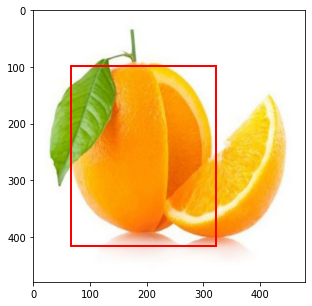

In [ ]:
print('EXPECTED OUTPUT')
plot_img_bbox(torch_to_pil(img), target)

MODEL OUTPUT


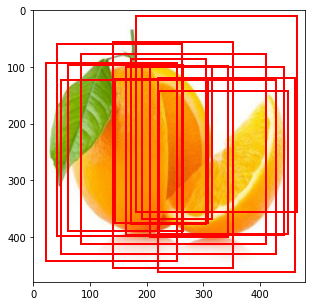

In [ ]:
print('MODEL OUTPUT')
plot_img_bbox(torch_to_pil(img), prediction)

Now, we will do the same but applying the non-maximum suppression method. We can see that the number of predicted bounding boxes has been reduced from 14 to 2.

NMS APPLIED MODEL OUTPUT


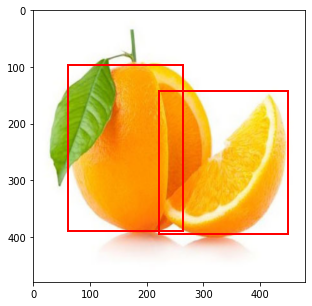

In [ ]:
nms_prediction = apply_nms(prediction, iou_thresh=0.2)
print('NMS APPLIED MODEL OUTPUT')
plot_img_bbox(torch_to_pil(img), nms_prediction)

Let's also try it with another image from the test set.

EXPECTED OUTPUT



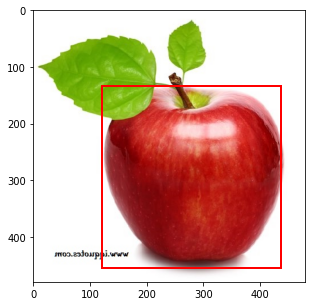

MODEL OUTPUT



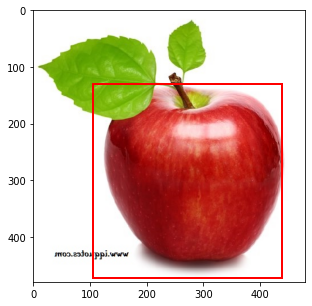

In [ ]:
test_dataset = FruitImagesDataset(test_dir, 480, 480, transforms= get_transform(train=True))
# pick one image from the test set
img, target = test_dataset[10]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])[0]
    
print('EXPECTED OUTPUT\n')
plot_img_bbox(torch_to_pil(img), target)
print('MODEL OUTPUT\n')
nms_prediction = apply_nms(prediction, iou_thresh=0.01)

plot_img_bbox(torch_to_pil(img), nms_prediction)